In [440]:
!dir /od "osaka"

 ドライブ C のボリューム ラベルは TIH0422000A です
 ボリューム シリアル番号は B2CC-6DCD です

 C:\Users\tabuchi\Desktop\osaka のディレクトリ

2022/08/05  22:00            95,976 20220805_142921_10dB_0.0015151515151515152V.csv
2022/08/05  22:00            95,972 20220805_142921_10dB_0.0030303030303030303V.csv
2022/08/05  22:00            95,940 20220805_142921_10dB_0.004545454545454545V.csv
2022/08/05  22:00            95,910 20220805_142921_10dB_0.006060606060606061V.csv
2022/08/05  22:00            95,843 20220805_142921_10dB_0.007575757575757576V.csv
2022/08/05  22:00            95,809 20220805_142921_10dB_0.00909090909090909V.csv
2022/08/05  22:00            95,683 20220805_142921_10dB_0.010606060606060607V.csv
2022/08/05  22:00            95,707 20220805_142921_10dB_0.012121212121212121V.csv
2022/08/05  22:00            95,487 20220805_142921_10dB_0.013636363636363636V.csv
2022/08/05  22:00            95,389 20220805_142921_10dB_0.015151515151515152V.csv
2022/08/05  22:00            95,254 20220805_142921_10dB_0.01666

In [545]:
import subprocess
import re
import numpy as np
import matplotlib.pylab as pl

In [546]:
ret=subprocess.run("dir /b osaka",capture_output=True,text=True,shell=True)

In [547]:
filenames=ret.stdout.split('\n'); filenames.pop(-1);

In [548]:
def get_value_from_filename(x):
  return float(re.split('(_|[V]\.[c])',x)[6])
file_info = sorted(zip(filenames,[get_value_from_filename(x) for x in filenames]),key=lambda x:x[1])

In [549]:
vault = np.array([])
for filename,value in file_info:
  dat=np.loadtxt('osaka/'+filename,delimiter=',',skiprows=17,usecols=[0,1,2,3])
  dat[:,0]=value
  r, c = dat.shape; 
  vault = np.vstack((vault,dat.ravel())) if vault.size > 0 else dat.ravel()
vault=vault.reshape((vault.shape[0],r,c))

In [550]:
re0=np.power(10,vault[:,:,2]/20)*np.cos(np.pi*vault[:,:,3]/180)
im0=np.power(10,vault[:,:,2]/20)*np.sin(np.pi*vault[:,:,3]/180)
vault[:,:,2]=re0.copy()
vault[:,:,3]=im0.copy()

phase plot

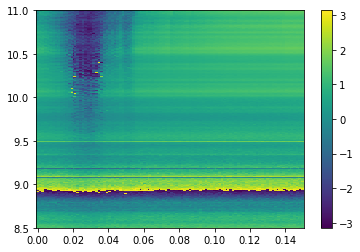

In [551]:
pl.pcolor(vault[:,:,0],vault[:,:,1],np.angle(-(vault[:,:,2]+1j*vault[:,:,3])))
pl.colorbar()

d(theta)/d(current) obtained through the numerical derivation using gauss convolution

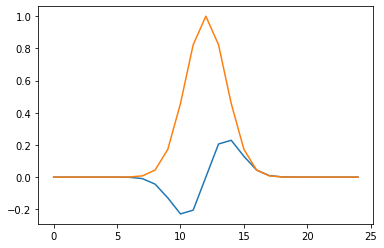

In [580]:
sigma=0.4
x=np.arange(-12,12.1)/4;
g=x*np.exp(-x*x/2/sigma**2)
h=np.exp(-x*x/2/sigma**2)

pl.plot(g)
pl.plot(h)

In [581]:
rdiff=np.array([])
idiff=np.array([])
reg  = np.array([])
img  = np.array([])
for i in range(r):
  _dat=np.convolve(g,vault[:,i,2],'same');  rdiff=np.vstack((rdiff,_dat)) if rdiff.size > 0 else _dat
  _dat=np.convolve(g,vault[:,i,3],'same');  idiff=np.vstack((idiff,_dat)) if idiff.size > 0 else _dat
  _dat=np.convolve(h,vault[:,i,2],'same');  reg=np.vstack((reg,_dat)) if reg.size > 0 else _dat
  _dat=np.convolve(h,vault[:,i,3],'same');  img=np.vstack((img,_dat)) if img.size > 0 else _dat
rdiff=rdiff.T
idiff=idiff.T
reg=reg.T
img=img.T

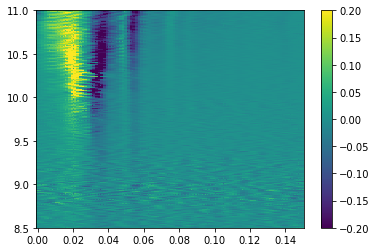

In [582]:
r2=reg*reg+img*img
diff=(idiff*reg-rdiff*img)/r2

pl.pcolor(vault[:,:,0],vault[:,:,1],(diff),vmin=-.2,vmax=.2)
pl.colorbar()